In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize

con = sqlite3.connect('HW2.db')

df_2018 = pd.read_sql_query("SELECT * FROM crime_2018", con)
df_2020 = pd.read_sql_query("SELECT * FROM crime_2020", con)
df_2022 = pd.read_sql_query("SELECT * FROM crime_2022", con)

In [2]:
df = pd.concat([df_2018, df_2020, df_2022], ignore_index=True)
df['MONTH'] = pd.to_numeric(df['MONTH'])


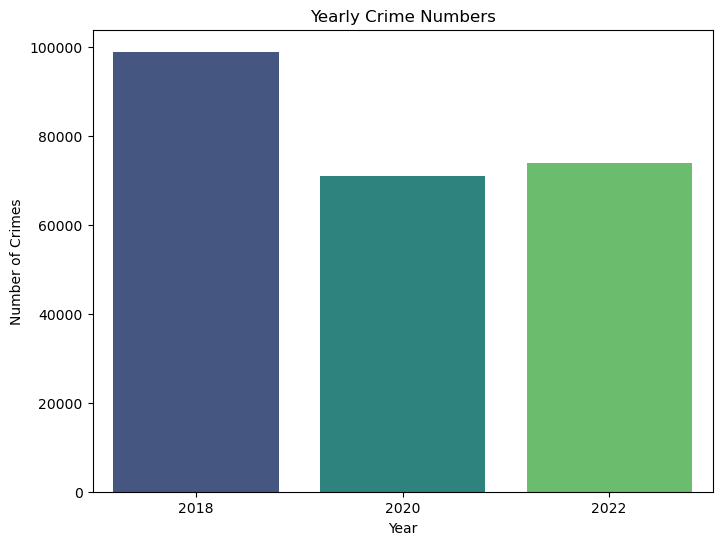

In [3]:
yearly_crimes = df.groupby('YEAR').size()

plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_crimes.index, y=yearly_crimes.values, palette='viridis')
plt.title('Yearly Crime Numbers')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

In [4]:
monthly_crimes = df.groupby(['YEAR', 'MONTH']).size().reset_index(name='Crime Count')
monthly_crimes

,YEAR,MONTH,Crime Count
0,2018,1,7860
1,2018,2,6997
2,2018,3,7849
3,2018,4,8004
4,2018,5,9072
5,2018,6,9026
6,2018,7,8789
7,2018,8,8871
8,2018,9,8566
9,2018,10,8441


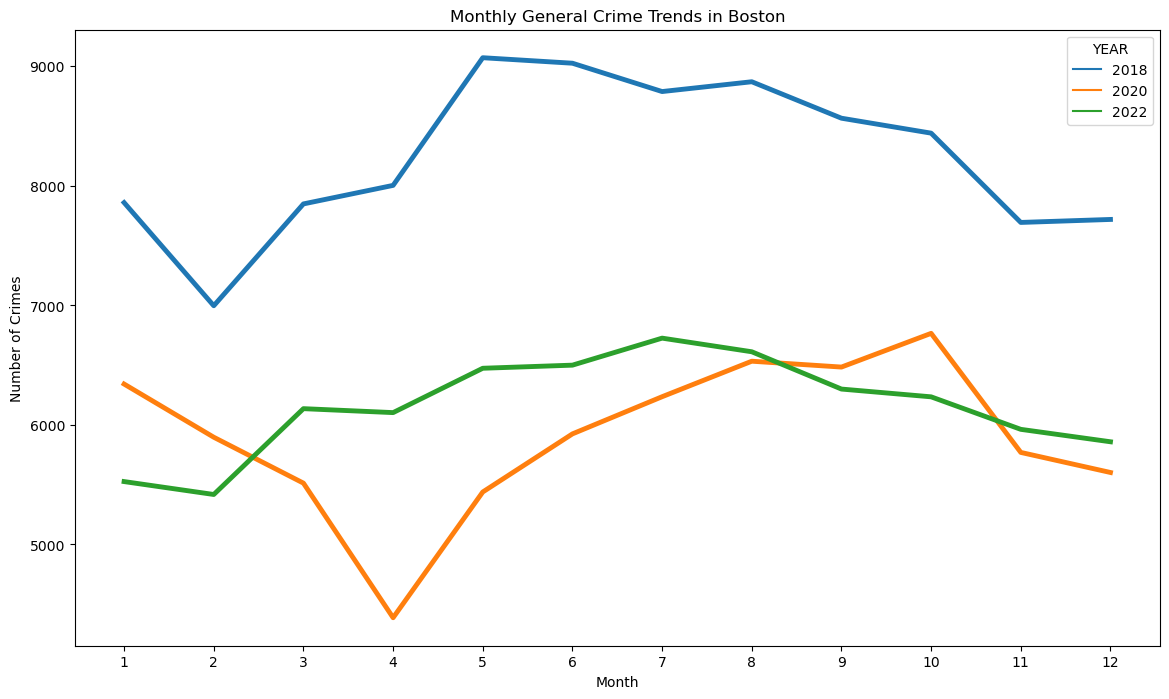

In [5]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_crimes, x='MONTH', y='Crime Count', hue='YEAR', palette='tab10', linewidth=3.5)
plt.title('Monthly General Crime Trends in Boston')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1,13))
plt.show()

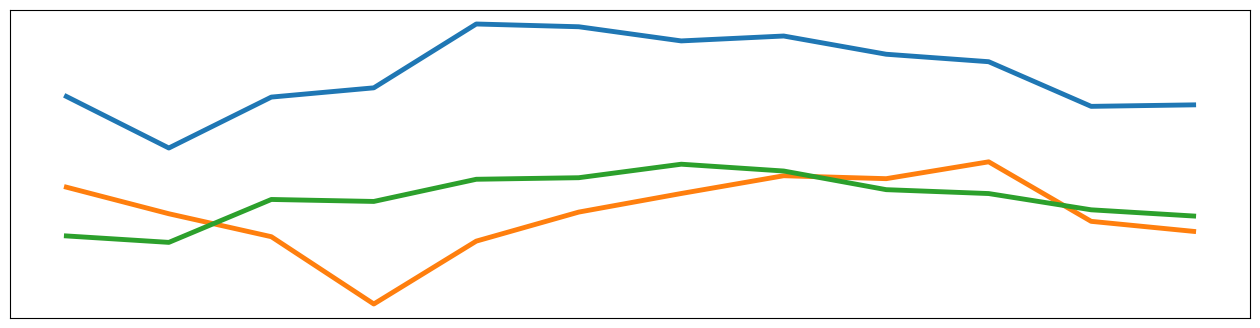

In [6]:
plt.figure(figsize=(16, 4))
sns.lineplot(data=monthly_crimes, x='MONTH', y='Crime Count', hue='YEAR', palette='tab10', legend=None, linewidth=3.5)
#plt.title('Monthly General Crime Trends in Boston')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
df['Long'] = pd.to_numeric(df['Long'])
df['Lat'] = pd.to_numeric(df['Lat'])

df_2018['Long'] = pd.to_numeric(df_2018['Long'])
df_2018['Lat'] = pd.to_numeric(df_2018['Lat'])

df = df[(df['Long'] > -71.175) & (df['Long'] < -71.000) & 
                 (df['Lat'] > 42.2) & (df['Lat'] < 42.380)]

df_filtered = df
df_filtered['YEAR'] = df_filtered['YEAR'].astype(int)
df_filtered_2018 = df_filtered[df_filtered['YEAR'] == 2018]
df_filtered_2020 = df_filtered[df_filtered['YEAR'] == 2020]
df_filtered_2022 = df_filtered[df_filtered['YEAR'] == 2022]

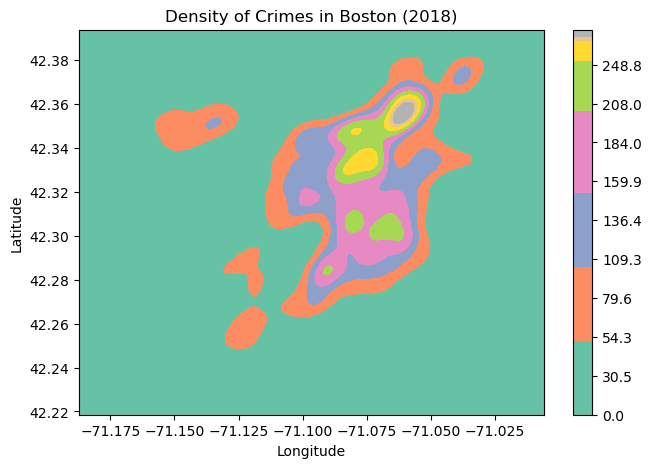

In [8]:
plt.figure(figsize=(7.5,5))
sns.kdeplot(
    data=df_filtered_2018, 
    x='Long', 
    y='Lat',
    fill=True,
    thresh=0,
    levels=100,
    gridsize=200,
    cmap='Set2', 
    cbar=True
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Crimes in Boston (2018)')
plt.show()

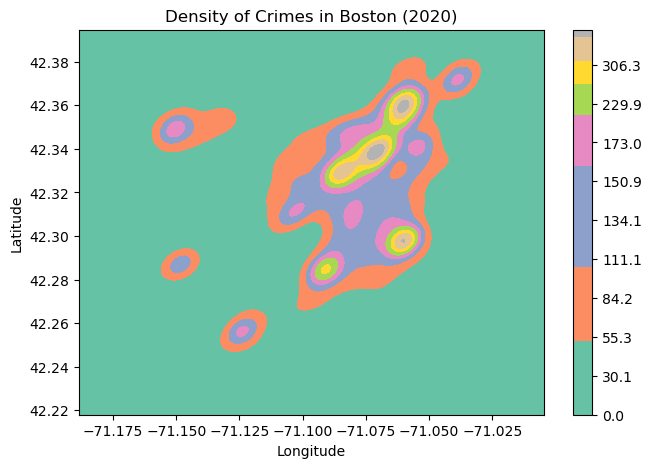

In [9]:
plt.figure(figsize=(7.5,5))
sns.kdeplot(
    data=df_filtered_2020, 
    x='Long', 
    y='Lat',
    fill=True,
    thresh=0,
    levels=100,
    gridsize=200,
    cmap='Set2', 
    cbar=True
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Crimes in Boston (2020)')
plt.show()

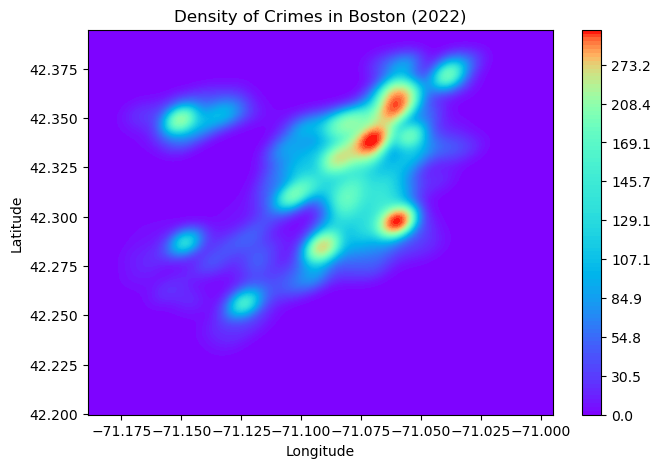

In [10]:
plt.figure(figsize=(7.5,5))
sns.kdeplot(
    data=df_filtered_2022, 
    x='Long', 
    y='Lat',
    fill=True,
    thresh=0,
    levels=100,
    gridsize=200,
    cmap='rainbow', 
    cbar=True
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Crimes in Boston (2022)')
plt.show()

In [11]:
query = """
SELECT DAY_OF_WEEK, HOUR, COUNT(*) as crime_count
FROM crime_2018
GROUP BY DAY_OF_WEEK, HOUR
ORDER BY DAY_OF_WEEK, HOUR
"""
crime_time = pd.read_sql_query(query, con)
crime_time['HOUR'] = crime_time['HOUR'].astype(int)

crime_time

,DAY_OF_WEEK,HOUR,crime_count
0,Friday,0,663
1,Friday,1,395
2,Friday,10,937
3,Friday,11,859
4,Friday,12,857
...,...,...,...
163,Wednesday,5,157
164,Wednesday,6,259
165,Wednesday,7,483
166,Wednesday,8,678


In [12]:
crime_time_pivot = crime_time.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')
crime_time_pivot = crime_time_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
crime_time_pivot

/var/folders/22/xxnr4399283ftrnqy2q0c9n00000gn/T/ipykernel_83533/2923930477.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_time_pivot = crime_time.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')


HOUR,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DAY_OF_WEEK,,,,,,,,,,,,,,,,,,,,,
Monday,699,303,298,172,127,146,260,431,648,666,...,802,757,921,924,966,782,733,562,504,403
Tuesday,608,320,189,120,123,178,271,429,642,771,...,802,800,913,936,986,787,755,585,472,394
Wednesday,623,259,236,125,115,157,259,483,678,736,...,863,795,964,937,958,822,679,633,498,381
Thursday,726,315,257,177,138,127,241,468,649,733,...,789,794,832,921,947,747,688,621,540,416
Friday,663,395,281,135,149,153,243,419,667,675,...,837,751,903,996,856,833,709,642,649,578
Saturday,830,544,527,286,186,141,171,345,488,529,...,765,648,769,797,801,657,644,691,610,631
Sunday,733,590,565,314,220,158,155,242,337,476,...,630,578,675,763,754,651,644,625,548,397


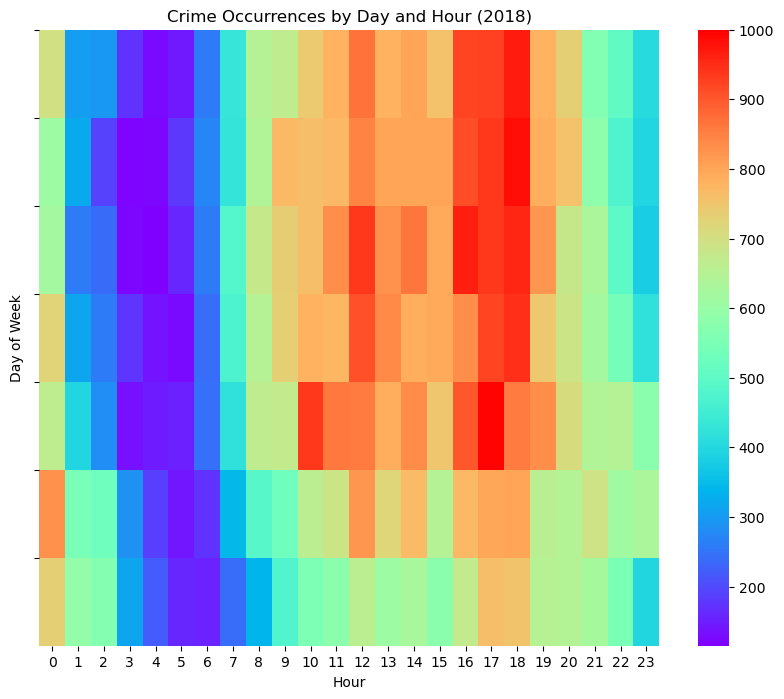

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(crime_time_pivot, cmap='rainbow', vmax=1000)
plt.title('Crime Occurrences by Day and Hour (2018)')
plt.ylabel('Day of Week')
plt.xlabel('Hour')
plt.yticks(ticks=range(7)) 
plt.show()

In [14]:
query = """
SELECT DAY_OF_WEEK, HOUR, COUNT(*) as crime_count
FROM crime_2020
GROUP BY DAY_OF_WEEK, HOUR
ORDER BY DAY_OF_WEEK, HOUR
"""
crime_time_20 = pd.read_sql_query(query, con)
crime_time_20['HOUR'] = crime_time_20['HOUR'].astype(int)

crime_time_20_pivot = crime_time_20.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')
crime_time_20_pivot = crime_time_20_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

crime_time_20_pivot

/var/folders/22/xxnr4399283ftrnqy2q0c9n00000gn/T/ipykernel_83533/2665332556.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_time_20_pivot = crime_time_20.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')


HOUR,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DAY_OF_WEEK,,,,,,,,,,,,,,,,,,,,,
Monday,792,231,188,139,107,116,152,324,416,529,...,586,561,656,630,609,502,464,406,340,244
Tuesday,642,215,154,108,85,106,197,288,427,519,...,576,569,671,648,597,526,507,404,361,244
Wednesday,726,244,175,128,97,128,166,289,447,494,...,618,554,672,668,593,535,491,465,363,324
Thursday,715,221,155,114,99,109,172,255,413,516,...,570,562,664,649,625,584,474,464,389,289
Friday,729,242,183,116,106,89,145,261,380,514,...,571,604,704,662,646,577,516,476,432,400
Saturday,699,338,298,164,106,111,115,226,355,387,...,510,513,555,547,535,531,526,458,413,379
Sunday,689,342,280,221,142,123,112,164,249,322,...,457,436,560,557,530,434,475,437,388,243


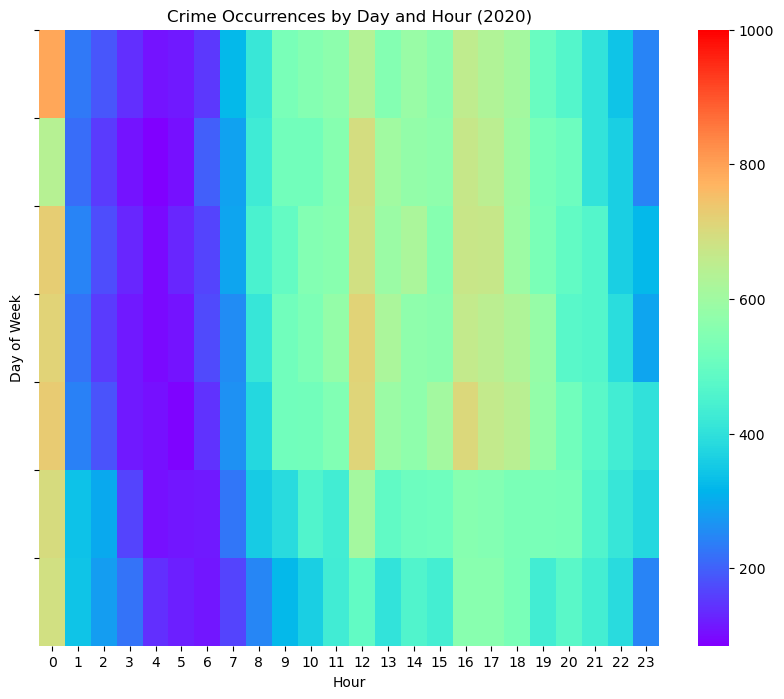

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(crime_time_20_pivot, cmap='rainbow', vmax=1000)
plt.title('Crime Occurrences by Day and Hour (2020)')
plt.ylabel('Day of Week')
plt.xlabel('Hour')
plt.yticks(ticks=range(7))
plt.show()

/var/folders/22/xxnr4399283ftrnqy2q0c9n00000gn/T/ipykernel_83533/4015359260.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_time_22_pivot = crime_time_22.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')


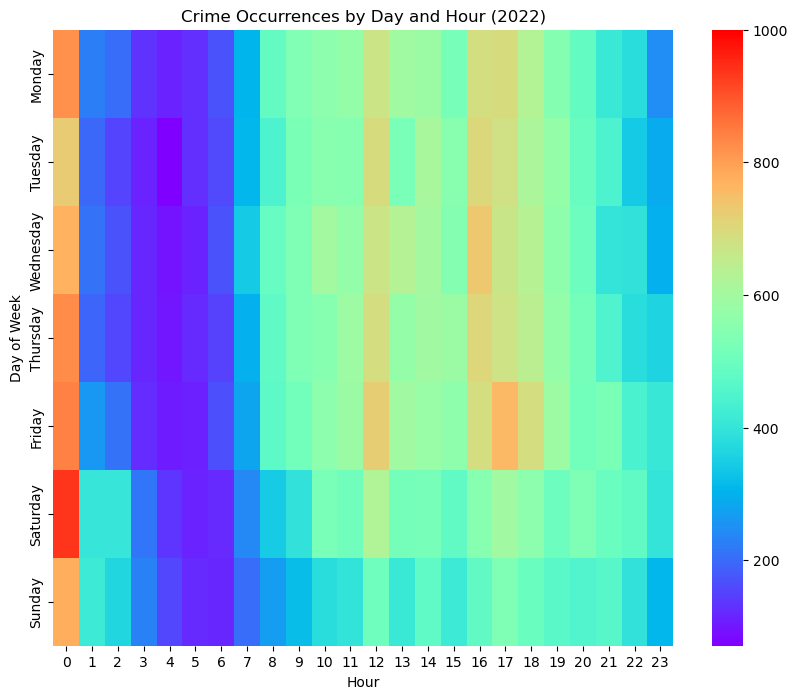

In [17]:
query = """
SELECT DAY_OF_WEEK, HOUR, COUNT(*) as crime_count
FROM crime_2022
GROUP BY DAY_OF_WEEK, HOUR
ORDER BY DAY_OF_WEEK, HOUR
"""
crime_time_22 = pd.read_sql_query(query, con)
crime_time_22['HOUR'] = crime_time_22['HOUR'].astype(int)

crime_time_22_pivot = crime_time_22.pivot('DAY_OF_WEEK', 'HOUR', 'crime_count')
crime_time_22_pivot = crime_time_22_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 8))
sns.heatmap(crime_time_22_pivot, cmap='rainbow', vmax=1000)
plt.title('Crime Occurrences by Day and Hour (2022)')
plt.ylabel('Day of Week')
plt.xlabel('Hour')
plt.show()

In the above two graphs, the 0-hour statistics are higher than in 2018 due to the increase in (primarily) the number of "Sick Assist" and "Investigate Person" incidents logged at those hours. This may be due to the method of reporting incidents rather than a true increase in crime rates at those hours. 

In [18]:
query = """
select MONTH, count(*) as COUNT
from crime_2018
where SHOOTING = 'Y'
group by month
"""

shootings_18 = pd.read_sql(query, con)
shootings_18['MONTH'] = shootings_18['MONTH'].astype(int)
shootings_18.sort_values(by='MONTH', inplace=True)
shootings_18

,MONTH,COUNT
0,1,39
4,2,19
5,3,12
6,4,23
7,5,36
8,6,62
9,7,44
10,8,30
11,9,37
1,10,46


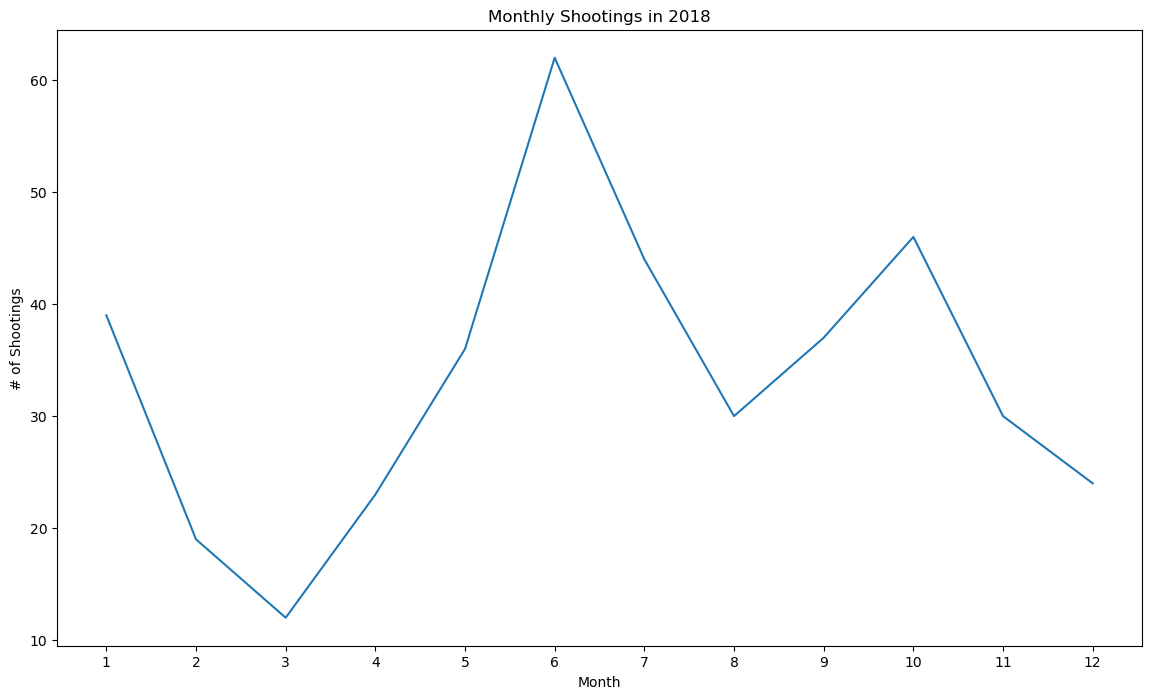

In [19]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=shootings_18, x='MONTH', y='COUNT')
plt.title('Monthly Shootings in 2018')
plt.xlabel('Month')
plt.ylabel('# of Shootings')
plt.xticks(range(1,13))
plt.show()

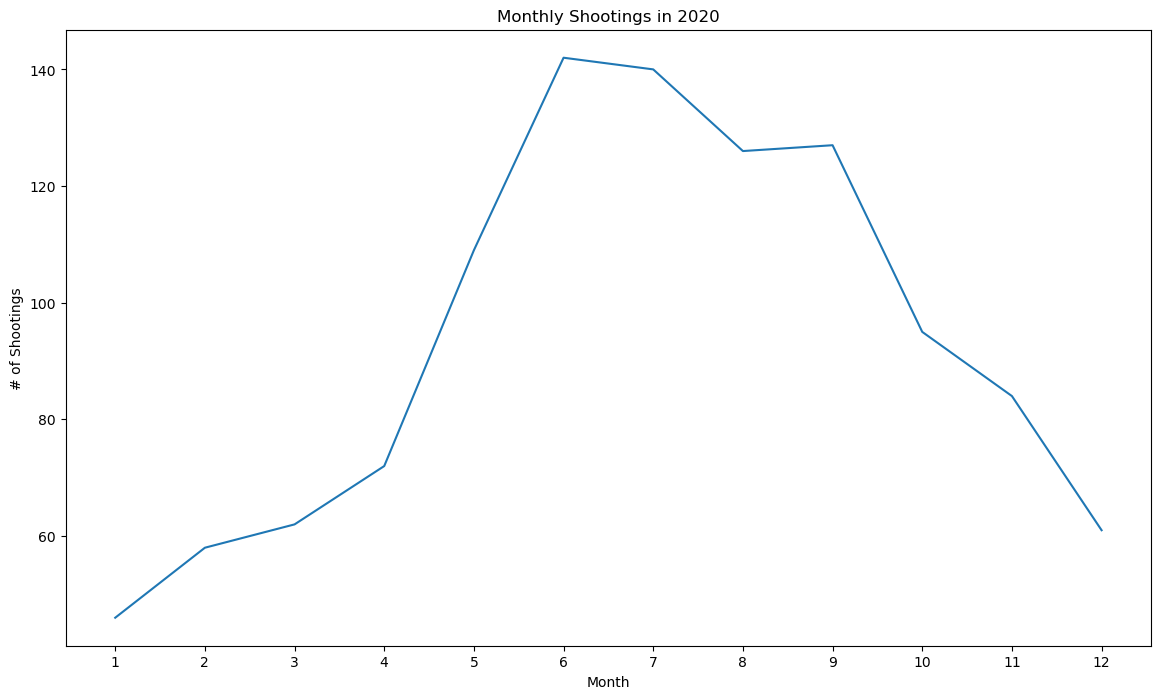

In [20]:
query = """
select MONTH, count(*) as COUNT
from crime_2020
where SHOOTING = 1
group by month
"""

shootings_20 = pd.read_sql(query, con)
shootings_20['MONTH'] = shootings_20['MONTH'].astype(int)
shootings_20.sort_values(by='MONTH', inplace=True)
shootings_20

plt.figure(figsize=(14, 8))
sns.lineplot(data=shootings_20, x='MONTH', y='COUNT')
plt.title('Monthly Shootings in 2020')
plt.xlabel('Month')
plt.ylabel('# of Shootings')
plt.xticks(range(1,13))
plt.show()

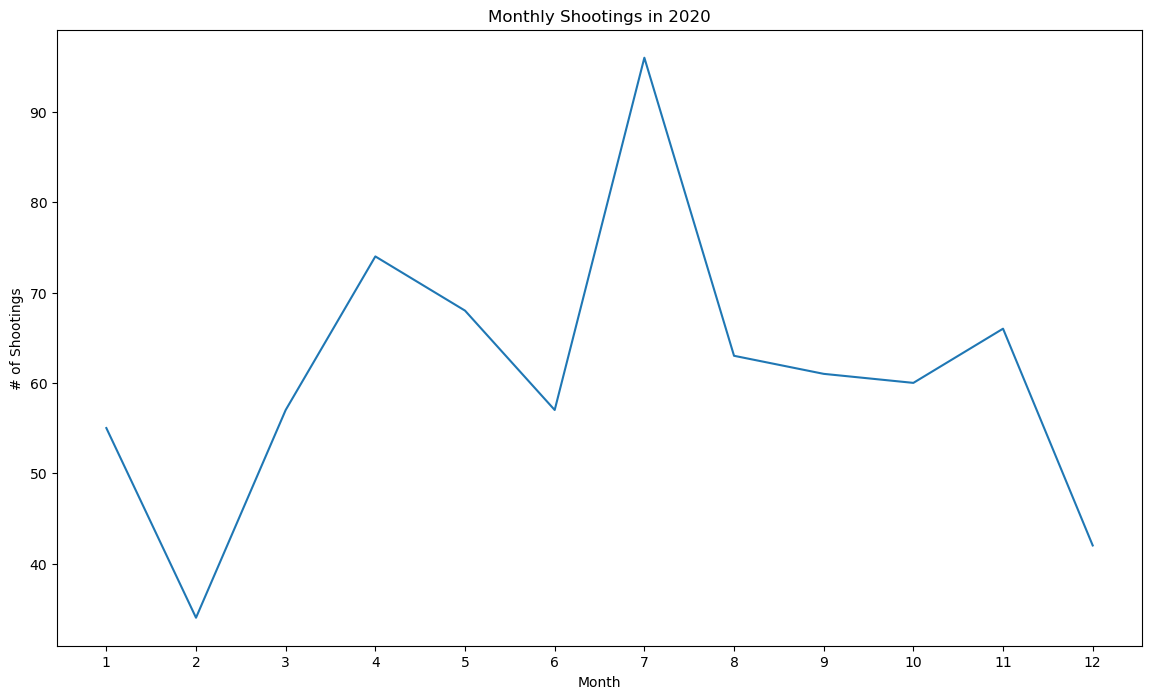

In [21]:
query = """
select MONTH, count(*) as COUNT
from crime_2022
where SHOOTING = 1
group by month
"""

shootings_22 = pd.read_sql(query, con)
shootings_22['MONTH'] = shootings_22['MONTH'].astype(int)
shootings_22.sort_values(by='MONTH', inplace=True)
shootings_22

plt.figure(figsize=(14, 8))
sns.lineplot(data=shootings_22, x='MONTH', y='COUNT')
plt.title('Monthly Shootings in 2020')
plt.xlabel('Month')
plt.ylabel('# of Shootings')
plt.xticks(range(1,13))
plt.show()

In [22]:
shootings_all = pd.concat([shootings_18, shootings_20, shootings_22], ignore_index=True)
shootings_all['YEAR'] = monthly_crimes['YEAR']

shootings_all

,MONTH,COUNT,YEAR
0,1,39,2018
1,2,19,2018
2,3,12,2018
3,4,23,2018
4,5,36,2018
5,6,62,2018
6,7,44,2018
7,8,30,2018
8,9,37,2018
9,10,46,2018


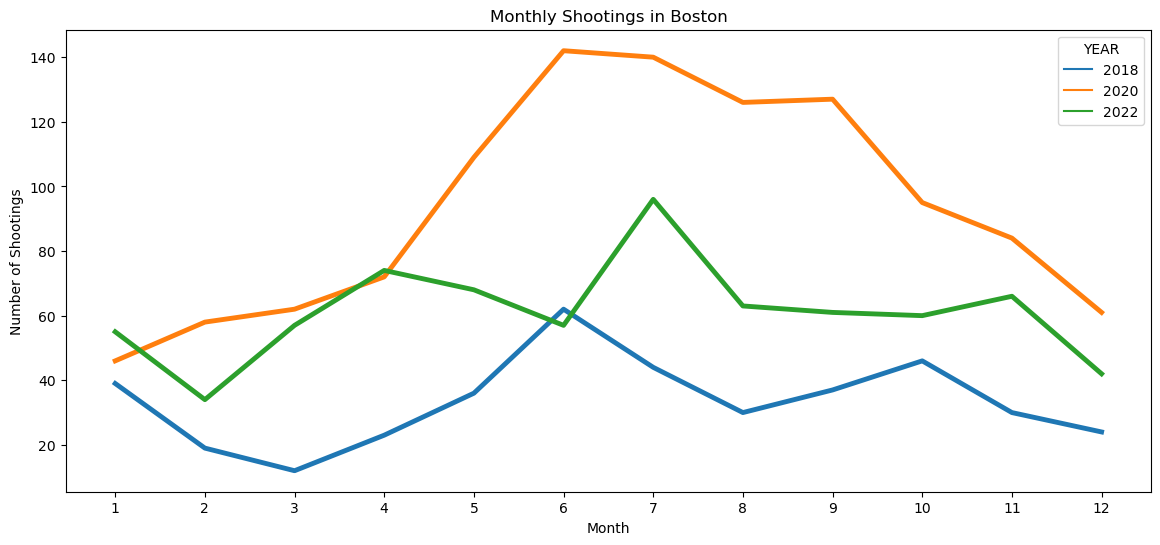

In [23]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=shootings_all, x='MONTH', y='COUNT', hue='YEAR', palette='tab10', linewidth=3.5)
plt.title('Monthly Shootings in Boston')
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.xticks(range(1,13))
plt.show()

"Violence peaked during the summer and fall, coinciding with massive protests over the police killing of George Floyd in Minneapolis, but “the connection, if any, between the social unrest and heightened violence remains uncertain,” the think tank’s report said.

Connections between the COVID-19 pandemic and the uptick in violence are more concrete, according to the report. Social distancing has made it difficult for police to prevent and investigate crimes and also hampered anti-violence efforts by street outreach workers, the report said."

https://www.bostonglobe.com/2021/01/03/metro/homicides-shootings-are-rise-nationwide-boston-is-no-different/